# IMPORTS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

## Etapa 4

Nesta secção será 

In [2]:
# path="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\dataset.csv"
# data=pd.read_csv(path)
data=pd.read_csv('dataset.csv')


In [3]:
X = data.drop('Y', axis=1)
y = data['Y']

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Epoch 1/10
435/435 [==============================] - 86s 194ms/step - loss: 550.4529 - mean_squared_error: 550.4529 - val_loss: 504.5402 - val_mean_squared_error: 504.5402
Epoch 2/10
435/435 [==============================] - 83s 191ms/step - loss: 543.0251 - mean_squared_error: 543.0251 - val_loss: 500.6247 - val_mean_squared_error: 500.6247
Epoch 3/10
435/435 [==============================] - 85s 195ms/step - loss: 540.0179 - mean_squared_error: 540.0179 - val_loss: 497.0135 - val_mean_squared_error: 497.0135
Epoch 4/10
435/435 [==============================] - 84s 194ms/step - loss: 537.2775 - mean_squared_error: 537.2775 - val_loss: 493.7412 - val_mean_squared_error: 493.7412
Epoch 5/10
435/435 [==============================] - 85s 196ms/step - loss: 534.8331 - mean_squared_error: 534.8331 - val_loss: 490.7241 - val_mean_squared_error: 490.7241
Epoch 6/10
435/435 [==============================] - 90s 206ms/step - loss: 532.6431 - mean_squared_error: 532.6431 - val_loss: 487.97

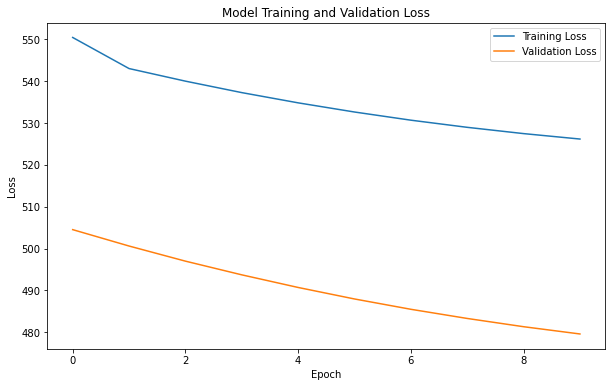

94/94 [==============================] - 4s 38ms/step - loss: 479.6130 - mean_squared_error: 479.6130
Mean Squared Error on Test Set: 479.61297607421875


In [7]:
import matplotlib.pyplot as plt
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)[1]
print("Mean Squared Error on Test Set:", mse)

Como as linhas descem e não se cruzam significa que o modelo está a aprender eficientemente sem overfitting. E por isso, podemos complicar as condições do modelo.

Epoch 1/10
435/435 [==============================] - 309s 708ms/step - loss: 511.8562 - mean_squared_error: 511.8562 - val_loss: 378.3298 - val_mean_squared_error: 378.3298
Epoch 2/10
435/435 [==============================] - 298s 685ms/step - loss: 443.4912 - mean_squared_error: 443.4912 - val_loss: 367.1133 - val_mean_squared_error: 367.1133
Epoch 3/10
435/435 [==============================] - 304s 699ms/step - loss: 434.5519 - mean_squared_error: 434.5519 - val_loss: 373.4406 - val_mean_squared_error: 373.4406
Epoch 4/10
435/435 [==============================] - 292s 672ms/step - loss: 432.2088 - mean_squared_error: 432.2088 - val_loss: 349.8995 - val_mean_squared_error: 349.8995
Epoch 5/10
435/435 [==============================] - 290s 667ms/step - loss: 425.3932 - mean_squared_error: 425.3932 - val_loss: 348.6203 - val_mean_squared_error: 348.6203
Epoch 6/10
435/435 [==============================] - 290s 667ms/step - loss: 427.2338 - mean_squared_error: 427.2338 - val_loss: 

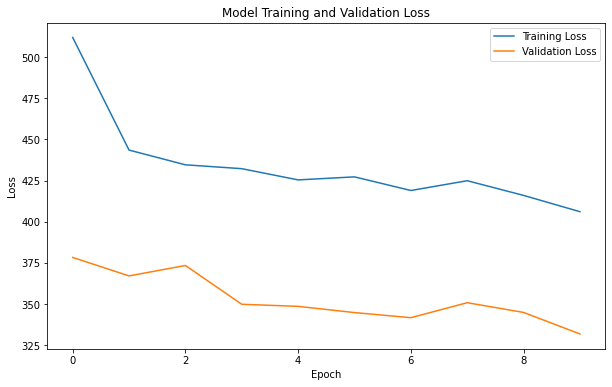

94/94 [==============================] - 9s 98ms/step - loss: 331.8654 - mean_squared_error: 331.8654
Mean Squared Error on Test Set: 331.86541748046875


In [8]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)[1]
print("Mean Squared Error on Test Set:", mse)

Epoch 1/10
435/435 [==============================] - 213s 486ms/step - loss: 450.0850 - mean_squared_error: 450.0850 - val_loss: 379.9015 - val_mean_squared_error: 379.9015
Epoch 2/10
435/435 [==============================] - 211s 486ms/step - loss: 419.6839 - mean_squared_error: 419.6839 - val_loss: 346.1338 - val_mean_squared_error: 346.1338
Epoch 3/10
435/435 [==============================] - 211s 486ms/step - loss: 414.5708 - mean_squared_error: 414.5708 - val_loss: 351.9200 - val_mean_squared_error: 351.9200
Epoch 4/10
435/435 [==============================] - 211s 486ms/step - loss: 403.6912 - mean_squared_error: 403.6912 - val_loss: 335.6736 - val_mean_squared_error: 335.6736
Epoch 5/10
435/435 [==============================] - 215s 494ms/step - loss: 391.8447 - mean_squared_error: 391.8447 - val_loss: 331.6998 - val_mean_squared_error: 331.6998
Epoch 6/10
435/435 [==============================] - 219s 504ms/step - loss: 401.3125 - mean_squared_error: 401.3125 - val_loss: 

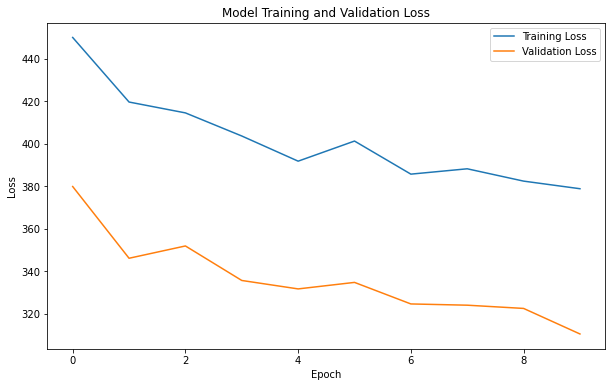

94/94 [==============================] - 10s 101ms/step - loss: 310.4811 - mean_squared_error: 310.4811
Mean Squared Error on Test Set: 310.4810791015625


In [10]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))  # Adding dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))  # Adding dropout
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))   # Adding dropout
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)[1]
print("Mean Squared Error on Test Set:", mse)